#  <center>**Car Price Project.**</center>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.set_option("max_columns", 100)
import seaborn as sns #; sns.set()


In [3]:
# reading the data set
df = pd.read_csv('CarPrice.csv')

In [4]:
df.shape

(205, 26)

In [5]:
# checking the overview of the data
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [6]:
#checking the colmn names, nul-values and data-types for each column all together at once.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
#cheking the describtive statistics for numerical varables only. 
df.describe()


car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [8]:
#cheking the describtive statistics for categorical varables only. 
df.describe(include = object)

CarName fueltype aspiration doornumber carbody drivewheel  \
count             205      205        205        205     205        205   
unique            147        2          2          2       5          3   
top     toyota corona      gas        std       four   sedan        fwd   
freq                6      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem  
count             205        205            205        205  
unique              2          7              7          8  
top             front        ohc           four       mpfi  
freq              202        148            159         94

In [9]:
#checking for duplicates
df.duplicated(subset = ("CarName","price")).sum()

0

In [10]:
#checking if all the values are formated corectly for categorical variables 
df["fueltype"].unique(), df["aspiration"].unique(), \
df["doornumber"].unique(), df["carbody"].unique(), \
df["drivewheel"].unique(), df["enginelocation"].unique(), \
df["enginetype"].unique(), df["cylindernumber"].unique(), \
df["fuelsystem"].unique()

(array(['gas', 'diesel'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['two', 'four'], dtype=object),
 array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       dtype=object),
 array(['rwd', 'fwd', '4wd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object),
 array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
       dtype=object),
 array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
       dtype=object))

In [11]:
x = df.select_dtypes(exclude = ['int', 'float'])
for col in x.columns:
    print(col, x[col].unique()) # to print categories name only
    print(col, x[col].value_counts())


CarName ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick ope

#### Checking for outliears

We afre going to check if the target feature/variable has an outliers, so we gon plot the histogram and boxplot together. Histogram will allow us to see the shape of out data s well as the outliears, but boxplot is greater for inspecting the outliears. lets check it


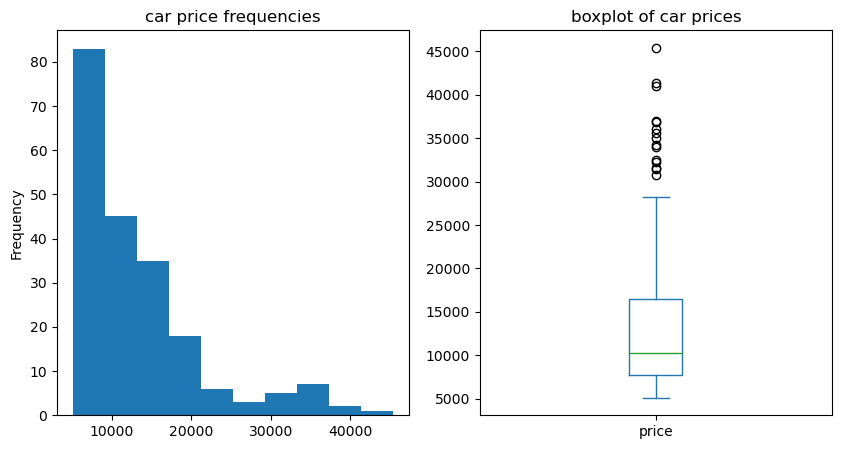

In [12]:
plt.subplot(121)
df["price"].plot(kind='hist', title = 'car price frequencies', figsize=(10,5))

plt.xticks(rotation=0)

plt.subplot(122)
df["price"].plot(kind='box', title = 'boxplot of car prices')

plt.xticks(rotation=0)
plt.show()



 After exploring the raw data:
1. We undrestood that our data contains of 205 rows and 26 columns, all coulmn names are consistant to  lower cases except the car_ID and CarName column names.  Also the CarName column consists of two parts car company name and car model. And every column has the excpected data type.
2. We didn't found or seen any null values in any row or cell in the data.
3. There we haven't detected any un-expected values in the data sets, such mis-spelled categorical values or errors made during the data entry process. 
4. There we have not detected any duplicates, but there are some cars that share everything except the CarName and price.
5. We have not seen a feature called collor which i think might be good predictor of car price.
6. we have detected outliers at the higher end of the price variable, which is the target feature. But we didn't checked outliers for any other columns.
7. Transforming the categorical variables and standardizing the numerical variables should be also part of the data cleaning plans for this project.

Next step,  we are going to clean the data, create new features, collect more data if it is possible. If we don't get what we are expecting from our new collections, we gon keep working with the current data sets.



#### 1. Cleaning, formating and preparing the data. (Part two)
2. Cleaning the inspected errors:
  * renaming columns so they all have one single case with no signs 
         (lower case, with no space, underscope or any other sign).
  * Sometimes we might create new features by splitting the "CarName" column into two coulmns (Company-name and Car-model)
    * But for this   project we don't need to include "company_name" or "car_model" in our independent features. 
  * handling outliers.
     * we will hundle the outliers after the EDA is applied.
  * transforming both categorical and numerical variables.
     * we will transform the selected features after the EDA, Descriptive Statitstics and Feature Selection tasks.

In [13]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
# renaming columns so each column has a lower case with no any sign
df = df.rename(columns={"car_ID": "carid", "CarName": "carname"})
#df =( x.lower().replace("_","")  x for i in df.columns)
df.columns



Index(['carid', 'symboling', 'carname', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#####  Dealing with outliears
Always when predicting a car price it's important to the remove outliers, as well we have right skewd car prices and outliers will hugly effect our model, So we have remove them.
(You have to also keep in mind, sometimes if the goal is to predict outliers; you gon need to keep them. but for this project we have to remove the outliers) 

In [15]:
# making copy of the data so multiple techiques of outlier detection and removal could be applied and compared
dq = df.copy()
dz = df.copy()

In [16]:
# Dettecting outliers
Q1 = dq.price.quantile(0.25)
Q3 = dq.price.quantile(0.75)
IQR = Q3-Q1
IQR

8715.0

In [17]:
#removing outliers
dq = dq[~((dq.price < (Q1-1.5*IQR)) | (dq.price > (Q3 + 1.5*IQR)))]
dq.head()

carid  symboling                   carname fueltype aspiration doornumber  \
0      1          3        alfa-romero giulia      gas        std        two   
1      2          3       alfa-romero stelvio      gas        std        two   
2      3          1  alfa-romero Quadrifoglio      gas        std        two   
3      4          2               audi 100 ls      gas        std       four   
4      5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

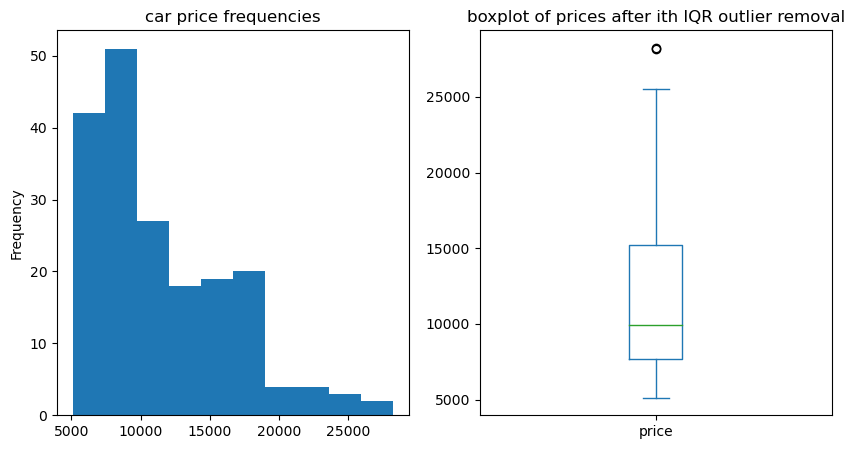

In [18]:
plt.subplot(121)
dq["price"].plot(kind='hist', title = 'car price frequencies', figsize=(10,5))

plt.xticks(rotation=0)

plt.subplot(122)
dq["price"].plot(kind='box', title = 'boxplot of prices after ith IQR outlier removal')

plt.xticks(rotation=0)
plt.show()

In [19]:
# removing outliers using the z-score method but for apply the cpdied dt dateframe 
# and we now we gon focus only on the higher end part where outliers are dettected in.

z_score = np.abs((dz["price"]-dz["price"].mean()) / dz["price"].std())
threat = 3
dz = dz[z_score <= threat]
 

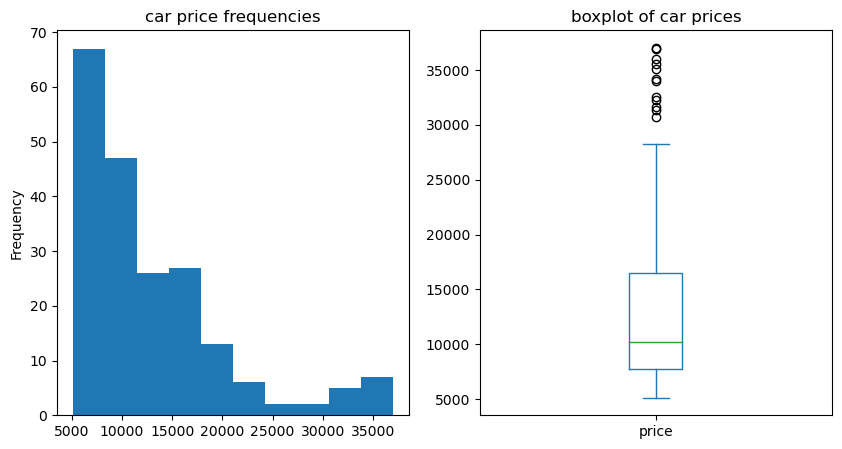

In [20]:
plt.subplot(121)
dz["price"].plot(kind='hist', title = 'car price frequencies', figsize=(10,5))

plt.xticks(rotation=0)

plt.subplot(122)
dz["price"].plot(kind='box', title = 'boxplot of car prices')

plt.xticks(rotation=0)
plt.show()

## Exploratory Data Analysis

EDA is one of the most important and crucial tasks in data science, sometimes it might be asked or ordered a project that only EDA might be applied. So while doing EDA, its important to keep in mind the following process:-
- Discover: This step involves exploring and undrestanding the data to idenfy patterns, trends and potential reshipis(e.g: data profiling, data visualization and summary statistics.
- Structuring: in this step data is organized and formatted in a way that is suitable for analysis. (e.g: reshaping the data, creating new variables, and transformaing the data in to more useful structures.
- Cleaning: This step invloves in removing all of the detected errors (e.g: data manipulation, dealing with missing values, removing outliears, and data validation)
- Joinin: This step involves combining multiple talbes or data stes to create one useful table. (e.g: mergin, concatenating, or appending  tables based on common variables or keys.)
- Validating: This step aims to ensure the accurecy and reliability of the data by checking for data integrity, consistency and adherence to predined rules or constraints (e.g: data quality assessment, data verification and data validation.)
- Presenting This step involves visualising and communicating the insights gained from the data analysis. (e.g: creating charts, graphs, dhashboards, or reports to effectively present the findings to stake holders or decision-makers.)
 
 __Note__:  These steps are iterable which means they can be repeated again and again, also there is no order in those steps; the order will depend on the goal of the project in hand.
 
 __For this project__(In-sha-allah): 
 - We have already tried to cleaned our data, but we have failled to remove all of the outliers. We did tried two method the IQR and the Z_score methods, the IQR did better than the Z_score; but the two of them failled to remove all outliers. so we gon try to solve in other way.
 - We gonna do descriptive statistics to check the corelations and associations between price and the other variables.
 - After recognizing the features that effect the car price, we gonna select only those features to stay focused on our goal.
 - We gonna examin those features and visualise them sepertly and tofether with the price variable.
 - we gonna make summary reports and present our findings in here.

In [21]:
df["tprice"] = (1/df["price"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carid             205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   carname           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

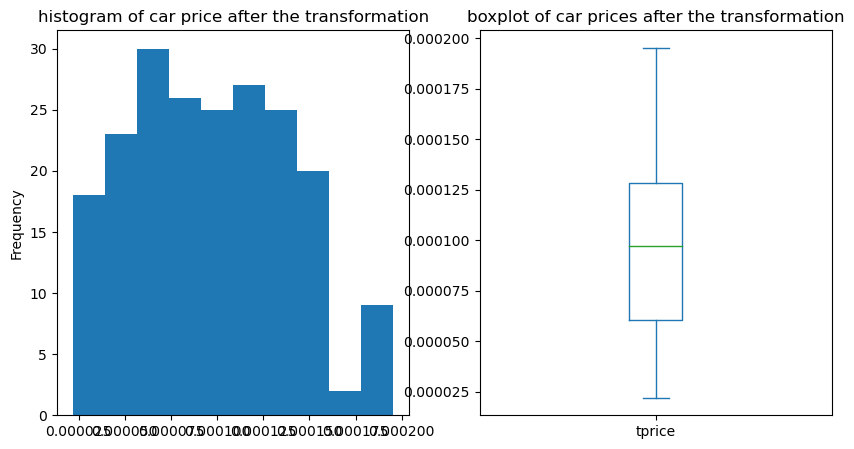

In [23]:
plt.subplot(121)
df["tprice"].plot(kind='hist', title = 'histogram of car price after the transformation', figsize=(10,5))

plt.xticks(rotation=0)

plt.subplot(122)
df["tprice"].plot(kind='box', title = 'boxplot of car prices after the transformation', figsize=(10,5) )

plt.xticks(rotation=0)
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carid             205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   carname           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [25]:
#transforming categorical varibales for checking their associations with the car price
df.describe()


carid   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  \
count  205.000000   205.000000  205.000000  205.000000    205.000000   
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571   
std     39.544167   476.985643    6.542142    6.886443   7988.852332   
min     48.000000  4150.000000   13.000000   16.000000   5118.000000   
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000   
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000   
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000   
max    288.000000  6600.000000   49.000000   54.000000  45400.000000   

           tprice  
count  205.000000  
mean     0.000097  
std      0.000042  
min      0.000022  
25%      0.000061  
50%      0.000097  
75%      0.000128  
max      0.000195

<Axes: >

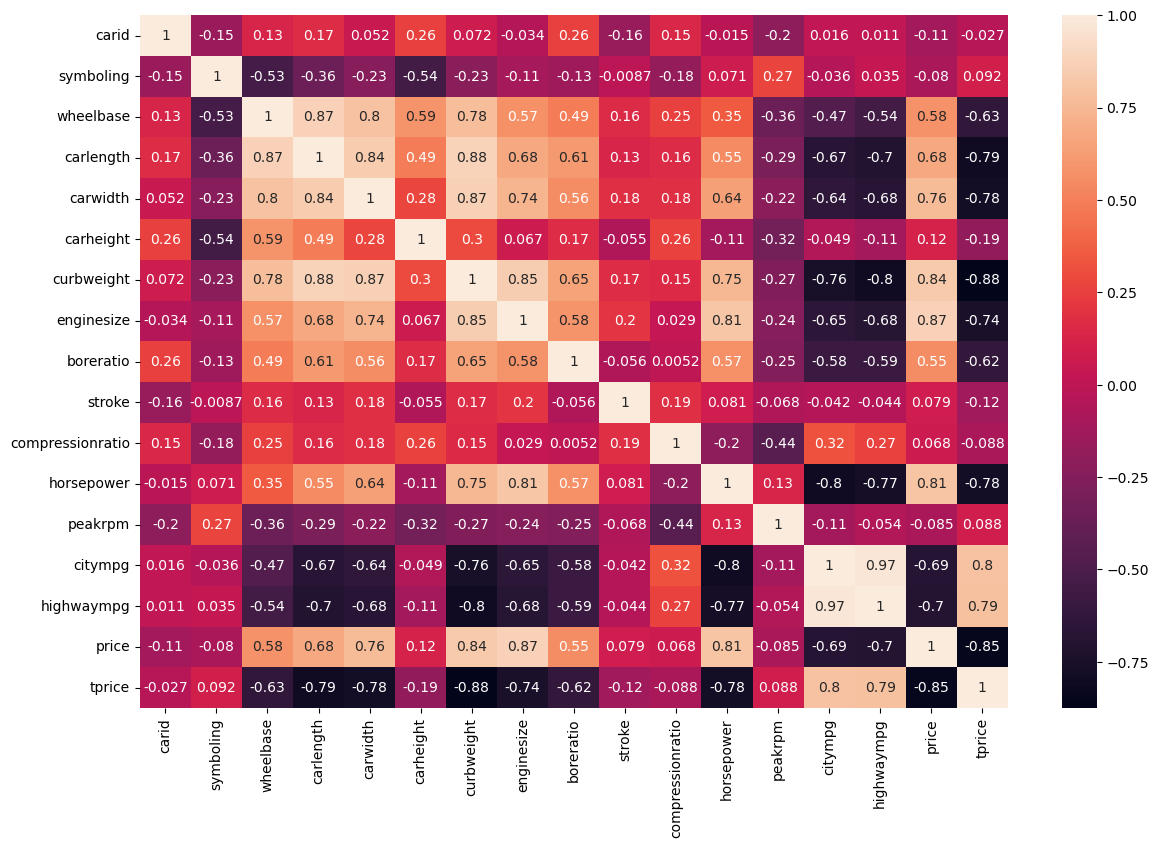

In [26]:
corr= df.corr(method = 'pearson', numeric_only=True)

plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True)

In [27]:
df.describe(include = object)


carname fueltype aspiration doornumber carbody drivewheel  \
count             205      205        205        205     205        205   
unique            147        2          2          2       5          3   
top     toyota corona      gas        std       four   sedan        fwd   
freq                6      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem  
count             205        205            205        205  
unique              2          7              7          8  
top             front        ohc           four       mpfi  
freq              202        148            159         94

In [28]:
# importing the important libraries for chi-squread test 
# to check associations between categorical variables and the target feature.
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [29]:
# preparing categorical features for chi-squared test to check their association with the price variable.

x = df[[
    "fueltype", 
    "doornumber",
    "carbody",
    "drivewheel",   
    "enginetype", 
    "cylindernumber", 
    "fuelsystem" ,
     "aspiration",
      "enginelocation"]]

    
y = df["price"].astype("int")




In [30]:
# transforming categorical feature for chi-squared test 

for col in x.columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15568\1484548190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15568\1484548190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15568\1484548190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Text(0.5, 1.0, 'P_value far each of the categorical variables')

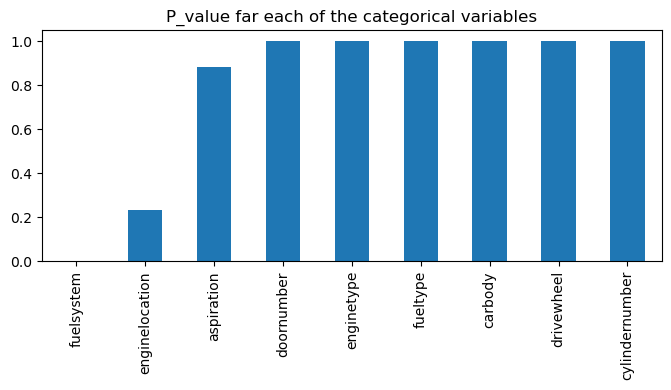

In [31]:
# applying the chi-suquared test and showing the results of the p-values
ch2_value, p_value = chi2(x,y)

plt.figure(figsize=(8,3))
p_value = pd.Series(p_value, index = x.columns)
p_value.sort_values(ascending=True, inplace=True)
p_value.plot.bar().set_title("P_value far each of the categorical variables")

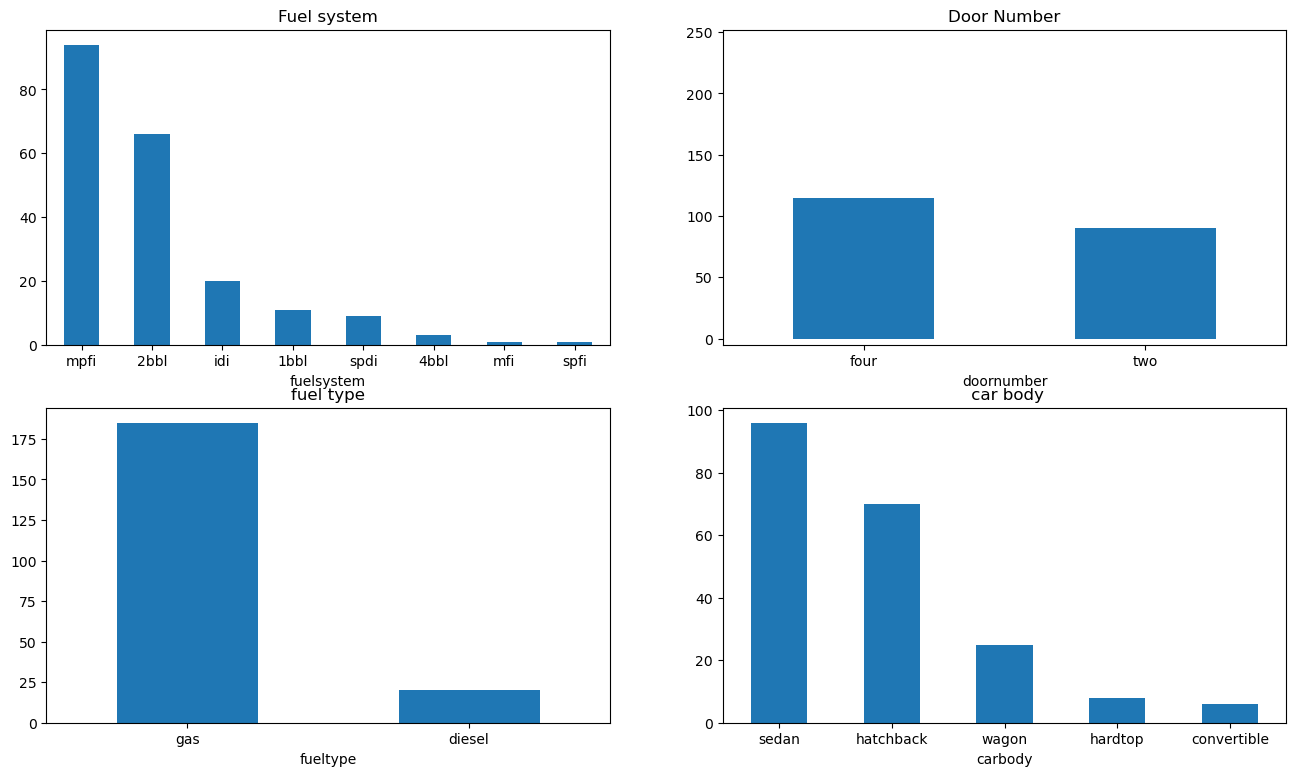

In [32]:
#plotting value counts of the most important categorical variables in one cell.

plt.subplot(221)

df['fuelsystem'].value_counts().plot(kind='bar', title='Fuel system', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

df['doornumber'].value_counts().plot(kind='bar', title='Door Number')

plt.xticks(rotation=0)
plt.ylim(-5, max(df['enginelocation'].value_counts())+50)
plt.subplot(223)

df['fueltype'].value_counts().plot(kind='bar', title='fuel type')
plt.xticks(rotation=0)

plt.subplot(224)

df['carbody'].value_counts().plot(kind='bar', title=' car body')

plt.xticks(rotation=0)



plt.show()

In [33]:
#selecting only correlated and associated variables with the price (both numeric and categorical)
dm = df[[ 
      "fuelsystem","wheelbase", "carlength",   "carwidth", 
      "curbweight", "enginesize", "boreratio", "horsepower",
      "citympg", "highwaympg", "price"]]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x300 with 0 Axes>

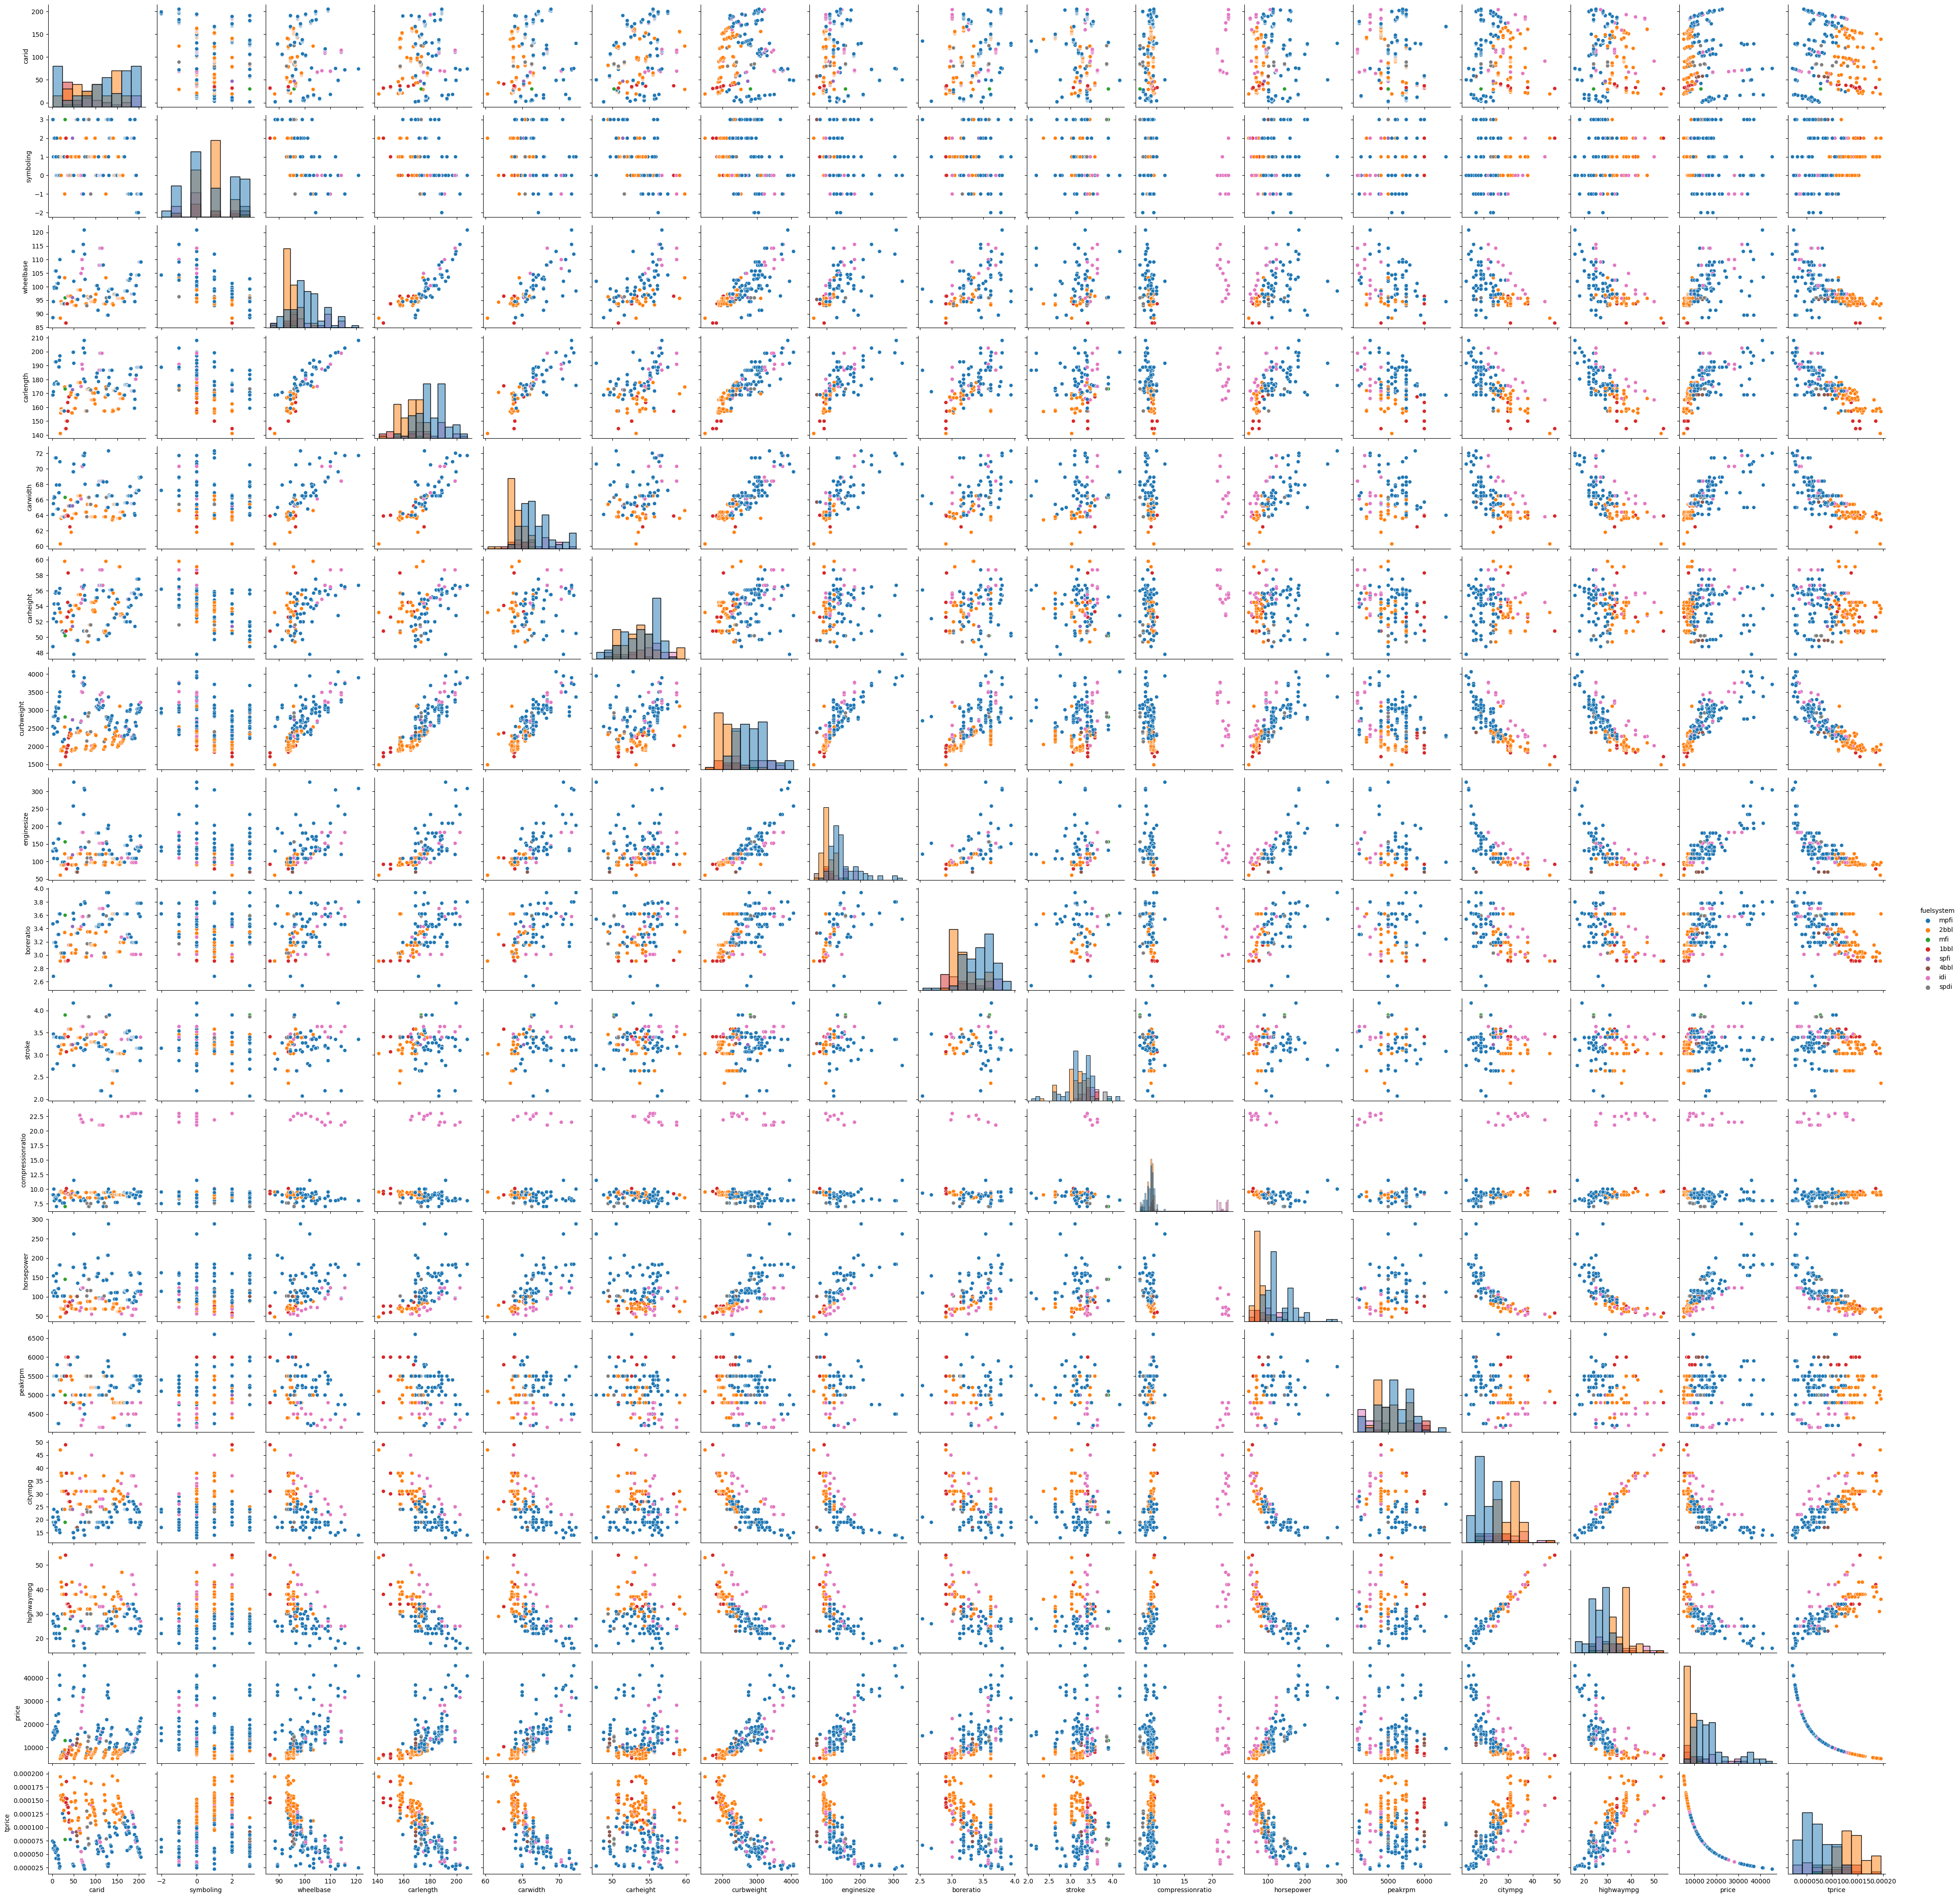

In [34]:
plt.figure(figsize=(8,3))
sns.pairplot(df, hue="fuelsystem", diag_kind="hist", kind="scatter")

Text(0.5, 1.0, 'Enginesize and price')

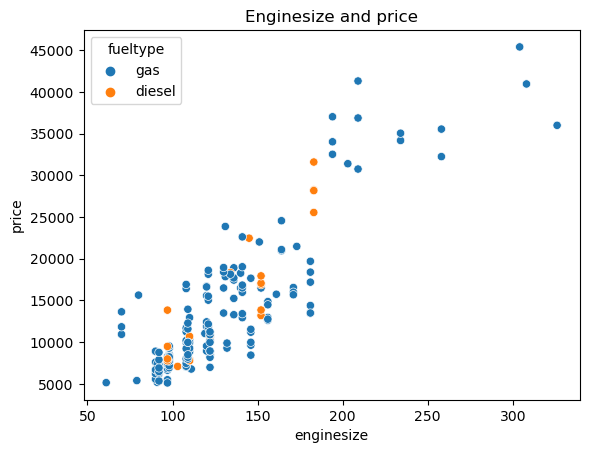

In [35]:
sns.scatterplot(data =dm, x= df["enginesize"], y=df["price"], hue=df["fueltype"]).set_title( "Enginesize and price")

Text(0.5, 1.0, 'Horse_power and price with fuel-system')

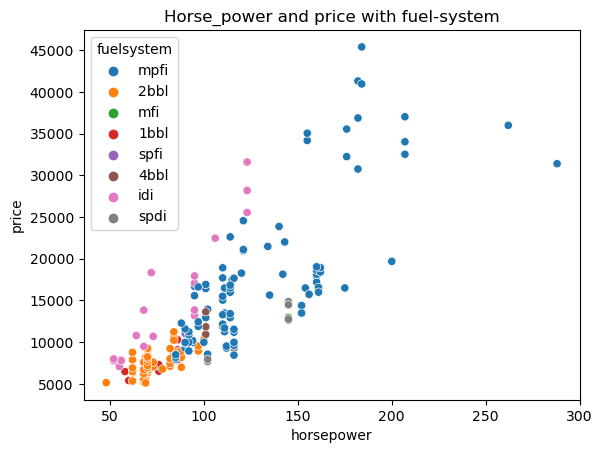

In [36]:
sns.scatterplot(data =dm, x= dm["horsepower"], y=dm["price"], hue=df["fuelsystem"],
    sizes=(20, 200), legend="full").set_title( "Horse_power and price with fuel-system")

Text(0.5, 1.0, 'High_way_mpg and price')

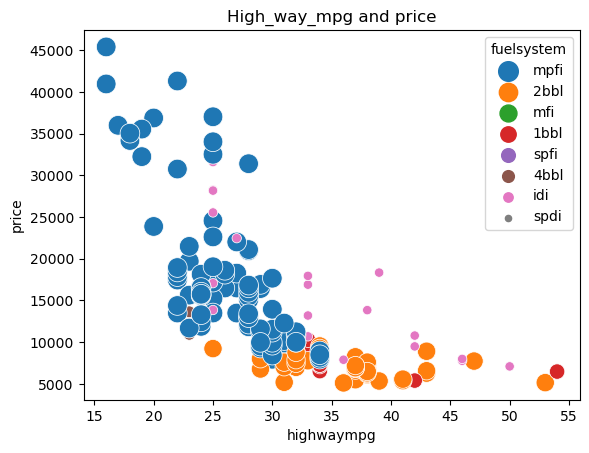

In [37]:
sns.scatterplot(data =df, x= df["highwaympg"], y=df["price"], hue=df["fuelsystem"], size ="fuelsystem",
    sizes=(20, 200), legend="full").set_title( "High_way_mpg and price")

Text(0.5, 1.0, 'Fuelsystm vs price')

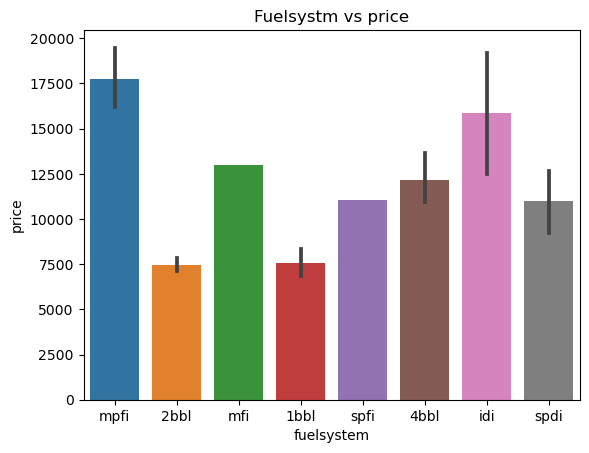

In [38]:
sns.barplot(data =df, x= df["fuelsystem"], y=df["price"], estimator=np.mean).set_title("Fuelsystm vs price")

In [39]:
#pd.to_numeric(df["symboling"])

In [40]:
df.describe()

carid   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  \
count  205.000000   205.000000  205.000000  205.000000    205.000000   
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571   
std     39.544167   476.985643    6.542142    6.886443   7988.852332   
min     48.000000  4150.000000   13.000000   16.000000   5118.000000   
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000   
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000   
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000   
max    288.000000  6600.000000   49.000000   54.000000  45400.000000   

           tprice  
count  205.000000  
mean     0.000097  
std      0.000042  
min      0.000022  
25%      0.000061  
50%      0.000097  
75%      0.000128  
max      0.000195

In [41]:
df["company"]= df.carname.str.split().str.get(0)
df.company


0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: company, Length: 205, dtype: object

In [42]:
df['company'] = df["company"].str.replace('volkswagen', 'vw')
df['company'] = df["company"].str.replace('vokswagen', 'vw')
df['company'] = df["company"].str.replace('maxda', 'mazda')
df['company'] = df["company"].str.replace('nissan', 'Nissan')
df['company'] = df["company"].str.replace('toyouta', 'toyota')
df['company'] = df["company"].str.replace('porcshce', 'porsche')

In [43]:
#df.to_csv('C:\\Users\\LENOVO\\Desktop\\Data science Projects\\car Price Project\\Clean_data.csv')

###  Modelling

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [45]:
df.head()

carid  symboling                   carname fueltype aspiration doornumber  \
0      1          3        alfa-romero giulia      gas        std        two   
1      2          3       alfa-romero stelvio      gas        std        two   
2      3          1  alfa-romero Quadrifoglio      gas        std        two   
3      4          2               audi 100 ls      gas        std       four   
4      5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  boreratio  stroke  \
0  convertible        rwd          front       88.6  ...       3.47    2.68   
1  convertible        rwd          front       88.6  ...       3.47    2.68   
2    hatchback        rwd          front       94.5  ...       2.68    3.47   
3        sedan        fwd          front       99.8  ...       3.19    3.40   
4        sedan        4wd          front       99.4  ...       3.19    3.40   

   compressionratio  horsepower peakrpm citympg  highwaympg    price  \
0               9.0         111    5000      21          27  13495.0   
1               9.0         111    5000      21          27  16500.0   
2               9.0         154    5000      19          26  16500.0   
3              10.0         102    5500      24          30  13950.0   
4               8.0         115    5500      18          22  17450.0   

     tprice      company  
0  0.000074  alfa-romero  
1  0.000061  alfa-romero  
2  0.000061  alfa-romero  
3  0.000072         audi  
4  0.000057         audi  

[5 rows x 28 columns]

In [46]:
x = df[['enginelocation','fuelsystem', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',"citympg", 'highwaympg']].copy()
y = df['price'].copy()

In [47]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.02, random_state= 42)

In [48]:
cat_x = ['enginelocation', 'fuelsystem']
num_x = [ 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'highwaympg',"citympg"]

In [49]:

onehotencoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler  = StandardScaler()
transformer = ColumnTransformer(
    transformers=[
        ('cat', onehotencoder, cat_x),
        ('num', scaler, num_x)
    ]
)

In [50]:
model_pipe = Pipeline(steps=[('transform', transformer), ('model', LinearRegression())])
model_pipe.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['enginelocation',
                                                   'fuelsystem']),
                                                 ('num', StandardScaler(),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'horsepower', 'highwaympg',
                                                   'citympg'])])),
                ('model', LinearRegression())])

In [62]:
y_hat = model_pipe.predict(x)
y_train_hat = model_pipe.predict(x_train)
y_test_hat = model_pipe.predict(x_test)

In [63]:
print('R_squared:', model_pipe.score(x_test,y_test))

R_squared: 0.8618947454138737


In [64]:
import seaborn as sns

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15568\2458787553.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color ='r', label= 'Actual')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15568\2458787553.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

<Axes: xlabel='price', ylabel='Density'>

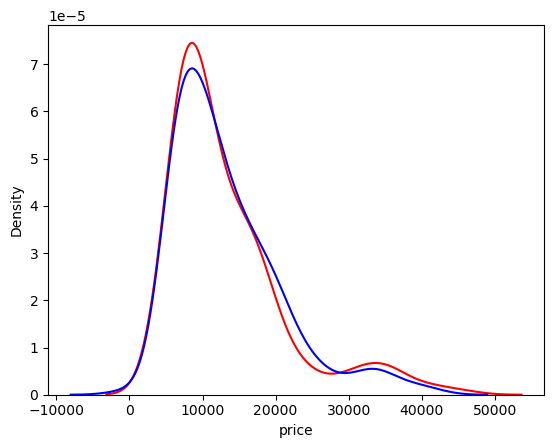

In [65]:
ax1 = sns.distplot(df['price'], hist=False, color ='r', label= 'Actual')
sns.distplot(y_hat, hist= False, color='b', label = 'fitted', ax = ax1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15568\90867018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False, color ='r', label= 'Actual')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15568\90867018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

<Axes: xlabel='price', ylabel='Density'>

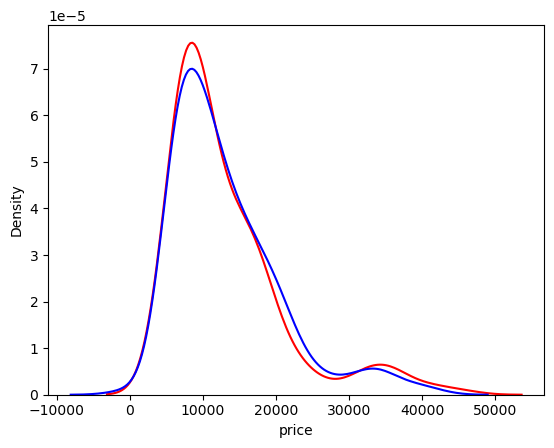

In [66]:
ax1 = sns.distplot(y_train, hist=False, color ='r', label= 'Actual')
sns.distplot(y_train_hat, hist= False, color='b', label = 'fitted', ax = ax1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15568\2268399427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color ='r', label= 'Actual')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15568\2268399427.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

<Axes: xlabel='price', ylabel='Density'>

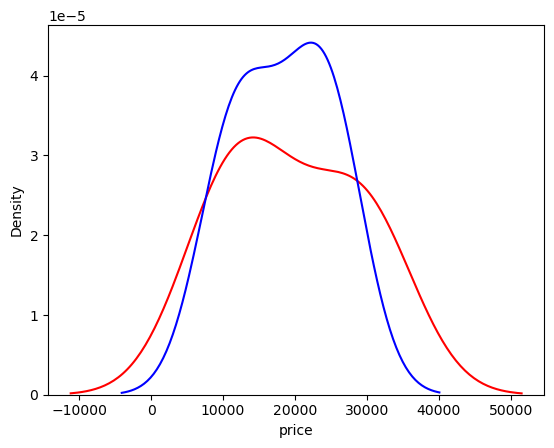

In [67]:
ax1 = sns.distplot(y_test, hist=False, color ='r', label= 'Actual')
sns.distplot(y_test_hat, hist= False, color='b', label = 'fitted', ax = ax1)